# Lab 1

## Model definition

In [ ]:
!pip install -q numpy torch
#!pip install scikit-learn pandas torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 69.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 50.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 72.6 MB/s eta 0:00:00


### Use gpu if possible

In [ ]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


### Define a model

In [ ]:
import torch.nn as nn

class GenderClassifier(nn.Module):

    def __init__(self, input_size: int, hidden1_size: int, hidden2_size: int, output_size: int):
        super(GenderClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden1_size)
        self.fc2 = nn.Linear(hidden1_size, hidden2_size)
        self.fc3 = nn.Linear(hidden2_size, output_size)

        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(1)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.softmax(self.fc3(x))

        return x


### Load and prepare dataset

In [ ]:
from torch.utils.data import DataLoader, TensorDataset, random_split
import torch
import pandas as pd

df = pd.read_csv("hr_data_gold.csv")

label = 'Gender_Male'
features = [c for c in df.columns if c != label]

# create tensors
X = torch.tensor(df[features].values, dtype=torch.float32).to(device)
y = torch.tensor(df[label].values, dtype=torch.long).to(device)

# create tensor dataframe
ds = TensorDataset(X, y)

# split data
train_size = int(0.8 * len(ds))
test_size = len(ds) - train_size
ds_train, ds_test = random_split(ds, [train_size, test_size])

# create loaders
all_loader  = DataLoader(ds, batch_size=1, shuffle=False)
train_loader = DataLoader(ds_train, batch_size=32, shuffle=True)
test_loader = DataLoader(ds_test, batch_size=1, shuffle=True)

### Learn model 96 x 48

In [ ]:
import torch.optim as optim
from sklearn.metrics import accuracy_score

%time
model = GenderClassifier(len(features), 96, 48, 2).to(device)

train_accuracy_log = []
test_accuracy_log = []

optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
epochs = 300

for epoch in range(epochs):
    # train
    model.train()
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        output = model(X_batch)
        loss = criterion(output, y_batch)
        loss.backward()
        optimizer.step()

    # calculate train_ds and test_ds accuracy
    with torch.no_grad():
        model.eval()
        train_features, train_labels = ds_train[:][0], ds_train[:][1]
        # Process all features at once
        train_pred = model(train_features).argmax(dim=1)
        train_accuracy = accuracy_score(train_labels.cpu(), train_pred.cpu())
        train_accuracy_log.append(train_accuracy)

        test_features, test_labels = ds_test[:][0], ds_test[:][1]
        # Process all features at once
        test_pred = model(test_features).argmax(dim=1)
        test_accuracy = accuracy_score(test_labels.cpu(), test_pred.cpu())
        test_accuracy_log.append(test_accuracy)


    print(f"Progress: {epoch / epochs * 100:.1f} %")

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 4.53 µs
Progress: 0.0 %
Progress: 0.3 %
Progress: 0.7 %
Progress: 1.0 %
Progress: 1.3 %
Progress: 1.7 %
Progress: 2.0 %
Progress: 2.3 %
Progress: 2.7 %
Progress: 3.0 %
Progress: 3.3 %
Progress: 3.7 %
Progress: 4.0 %
Progress: 4.3 %
Progress: 4.7 %
Progress: 5.0 %
Progress: 5.3 %
Progress: 5.7 %
Progress: 6.0 %
Progress: 6.3 %
Progress: 6.7 %
Progress: 7.0 %
Progress: 7.3 %
Progress: 7.7 %
Progress: 8.0 %
Progress: 8.3 %
Progress: 8.7 %
Progress: 9.0 %
Progress: 9.3 %
Progress: 9.7 %
Progress: 10.0 %
Progress: 10.3 %
Progress: 10.7 %
Progress: 11.0 %
Progress: 11.3 %
Progress: 11.7 %
Progress: 12.0 %
Progress: 12.3 %
Progress: 12.7 %
Progress: 13.0 %
Progress: 13.3 %
Progress: 13.7 %
Progress: 14.0 %
Progress: 14.3 %
Progress: 14.7 %
Progress: 15.0 %
Progress: 15.3 %
Progress: 15.7 %
Progress: 16.0 %
Progress: 16.3 %
Progress: 16.7 %
Progress: 17.0 %
Progress: 17.3 %
Progress: 17.7 %
Progress: 18.0 %
Progress: 18.3 %
Progress: 

In [ ]:
torch.save(model, "/content/model_96_48_b32_e300.pt")

In [ ]:
model = torch.load("/content/model_96_48_b32_e300.pt", weights_only=False)

# Lab 2

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
x = list(range(1, epochs + 1))

plt.plot(x, train_accuracy_log, label="Train accuracy")
plt.plot(x, test_accuracy_log, label="Test accuracy")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Learning Curve")
plt.grid(axis = 'y')
plt.show()

NameError: name 'epochs' is not defined

### Validation
- Accuracy
- Precusion
- Recall
- Confusion Matrix
- ROC

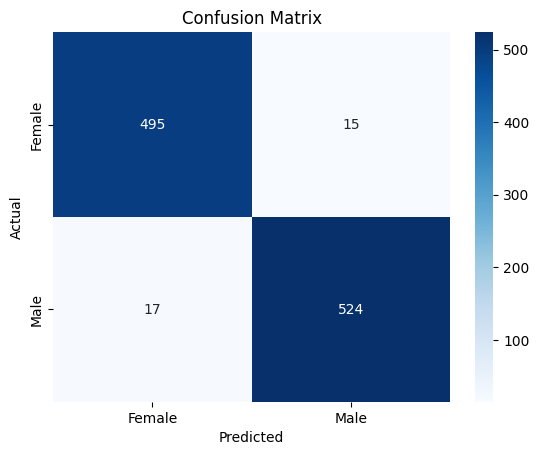

Accuracy:  0.9696
Precision: 0.9722
Recall:    0.9686
F1 Score:  0.9704


In [ ]:
model.eval()

all_preds = []
all_labels = []
all_results = []

with torch.no_grad():
    for X, y in test_loader:
        outputs = model.cpu()(X.cpu())
        all_results.append(outputs)
        preds = torch.argmax(outputs, dim=1)
        all_labels.append(y.cpu())
        all_preds.append(preds)

accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds)
recall = recall_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds)
conf_matrix = confusion_matrix(all_labels, all_preds)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Female", "Male"], yticklabels=["Female", "Male"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

### ROC curve

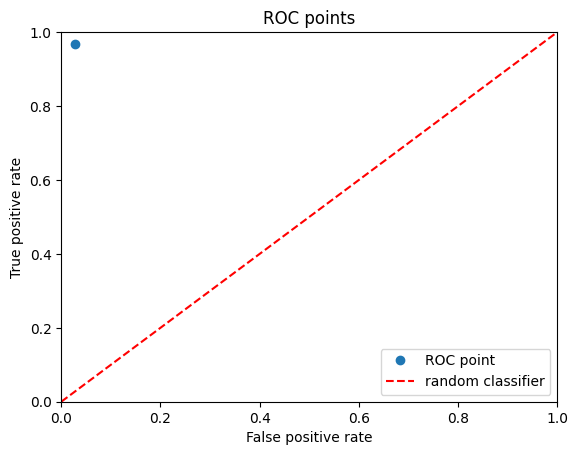

In [ ]:
import numpy as np
# TPR = TP / (TP + FN)
TPR = conf_matrix[0,0]/(conf_matrix[0,0] + conf_matrix[1, 0])
# FPR = FP / (FP + TN)
FPR = conf_matrix[0, 1]/(conf_matrix[0, 1] + conf_matrix[1, 1])

# plot ROC
plt.plot(FPR, TPR, 'o', label="ROC point")
plt.plot(np.linspace(0,1), np.linspace(0,1), color="red", linestyle="--",label="random classifier")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC points")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend()
plt.show()



### Predefined models benchmark

In [ ]:
!pip install -q scikit-learn pandas
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv("/content/hr_data_gold.csv")
feature_names = [c for c in df.columns if c != "Gender_Male"]
label_name = "Gender_Male"
X_train, X_test, y_train, y_test = train_test_split(df[feature_names], df[label_name], test_size = 0.2, random_state=42)

models = {
    "SVC": SVC(probability=True),
    "RandomForestClassifier": RandomForestClassifier(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "LogisticRegression": LogisticRegression(),
    "GaussianNB": GaussianNB(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}
results = {}

for name, model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  results[name] = {"accuracy_score": accuracy_score(y_test, y_pred)}
  print(f"{name} model accuracy: {results[name]['accuracy_score']}")


SVC model accuracy: 0.8039961941008563
RandomForestClassifier model accuracy: 0.9980970504281637
KNeighborsClassifier model accuracy: 0.7354900095147479
LogisticRegression model accuracy: 0.5680304471931494
GaussianNB model accuracy: 0.5204567078972407
DecisionTreeClassifier model accuracy: 0.9914367269267365


RandomForestClassifier has over 99,8% accuracy tested on never-seen data. However tree models are bad at generalizing but still the performence is impressive. It would be awesome to see how the model works on data from other companies or countries and it it remains high

In [ ]:
df.columns

Index(['Age', 'Attrition', 'DistanceFromHome', 'Education', 'JobLevel',
       'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'Gender_Male'],
      dtype='object')

In [ ]:
df[['Department_Research & Development', 'Department_Sales']].value_counts()

Department_Research & Development  Department_Sales
1                                  0                   3373
0                                  1                   1545
                                   0                    334
Name: count, dtype: int64

### Feature importance analysis

In [ ]:
### Feature importance analysis with aggregated categorical features
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def calculate_permutation_importance(model, X, y, feature_names, n_repeats=10):
    baseline_score = accuracy_score(y, model(X).argmax(dim=1))
    importance_scores = []

    for feature_idx in range(X.shape[1]):
        feature_scores = []
        for _ in range(n_repeats):
            X_permuted = X.clone()
            X_permuted[:, feature_idx] = X_permuted[:, feature_idx][torch.randperm(X.shape[0])]
            score = accuracy_score(y, model(X_permuted).argmax(dim=1))
            feature_scores.append(baseline_score - score)
        importance_scores.append(np.mean(feature_scores))

    return importance_scores

# Get test data
test_features, test_labels = ds_test[:][0].cpu(), ds_test[:][1].cpu()

# Calculate feature importance
importance_scores = calculate_permutation_importance(model.cpu(), test_features.cpu(), test_labels.cpu(), features.cpu())

# Group related features
feature_groups = {
    'EducationField': [f for f in features if f.startswith('EducationField_')],
    'Department': [f for f in features if f.startswith('Department_')],
    'JobRole': [f for f in features if f.startswith('JobRole_')],
    'BusinessTravel': [f for f in features if f.startswith('BusinessTravel_')],
    'MaritalStatus': [f for f in features if f.startswith('MaritalStatus_')]
}

# Calculate aggregated importance scores
aggregated_scores = {}
for group_name, group_features in feature_groups.items():
    if group_features:
        group_indices = [features.index(f) for f in group_features]
        aggregated_scores[group_name] = np.mean([importance_scores[i] for i in group_indices])

# Add individual numeric features
numeric_features = [f for f in features if f not in [item for sublist in feature_groups.values() for item in sublist]]
for feature in numeric_features:
    aggregated_scores[feature] = importance_scores[features.index(feature)]

# Sort features by importance
sorted_features = sorted(aggregated_scores.items(), key=lambda x: x[1])
feature_names = [f[0] for f in sorted_features]
scores = [f[1] for f in sorted_features]

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(range(len(feature_names)), scores)
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Feature Importance (Decrease in Accuracy)')
plt.title('Feature Importance Analysis (Aggregated Categorical Features)')
plt.tight_layout()
plt.show()

# Print all features with their importance scores
print("\nFeature Importance Scores:")
for feature, score in sorted_features:
    print(f"{feature}: {score:.4f}")